In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

<img src="https://miro.medium.com/max/875/1*XSBSL7LbDOvjXyi4wz-i_g.png" width=75% />

# California house dataset 

This is a built-in dataframe in sklearn so we call it from sklearn 

In [2]:
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
california_housing= fetch_california_housing()

In [3]:
print(california_housing.DESCR) # DESCR is one of the built in functions within this dataframe

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
california_housing.feature_names # Again, this is a built-in function 

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

### initializing a dataframe 

In [5]:
data= pd.DataFrame(california_housing.data, columns= california_housing.feature_names)

In [6]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Adding Y to the DataFrame

In [7]:
data['PRICE']= california_housing.target

In [8]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
data.shape

(20640, 9)

In [10]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [11]:
data.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
PRICE         float64
dtype: object

### Unique values in the DataFrame 

In [12]:
data.nunique()

MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
PRICE          3842
dtype: int64

### Checking for any missing values 

In [13]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

### viewing the data statistics 

In [14]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Undertaking feature engeneering 

<img src="https://4.bp.blogspot.com/-oizUdNg_XMk/WLAfW-f4ShI/AAAAAAAAEAE/hXpnuCzG-8098Ocsv5Vl-V45GNZ_zOv-QCLcB/s400/correlation_coefficient.gif" />


In [15]:
corr= data.corr()

In [16]:
corr.shape 

(9, 9)

In [17]:
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
PRICE,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<img src="https://www.datadeck.com/en/blog/wp-content/uploads/2018/11/cor-examples.png" />

### Plotting a heatmap for correlation between features 

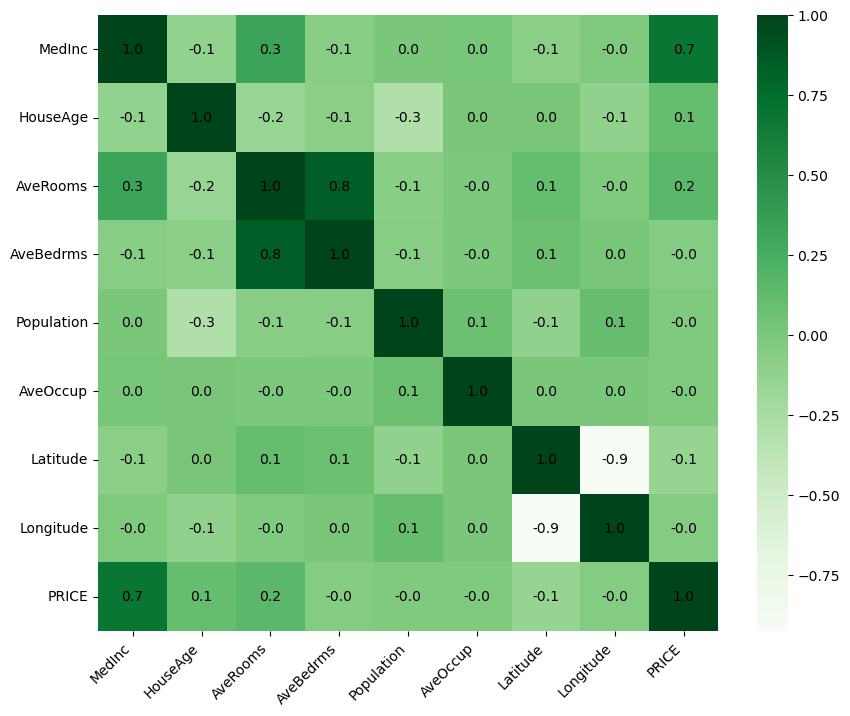

In [18]:
# Your correlation matrix as a NumPy array
corr_array = np.array(corr)

# Set the figure size
plt.figure(figsize=(10, 8))

# Generate the heatmap without annotations
heatmap = sns.heatmap(corr, cmap='Greens')

# Get the coordinates for each square
for i in range(corr_array.shape[0]):
    for j in range(corr_array.shape[1]):
        # Place the text for each square
        text = heatmap.text(j + 0.5, i + 0.5, '{:.1f}'.format(corr_array[i, j]),
                            ha="center", va="center", color="black")

# Rotate the tick labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()


This code snippet is a Python script using NumPy, Matplotlib, and Seaborn libraries to generate and visualize a heatmap of a correlation matrix. Let's break down the snippet into its main components:

1. **Importing Libraries (Implied):** Although not shown directly, this snippet implies that the `numpy` library is imported as `np`, and plotting libraries `matplotlib.pyplot` as `plt` and `seaborn` as `sns` are also imported. These libraries are essential for numerical operations (NumPy) and data visualization (Matplotlib and Seaborn).

2. **Creating a NumPy Array for the Correlation Matrix:**
   ```python
   corr_array = np.array(corr)
   ```
   This line converts the `corr` object (presumably a Pandas DataFrame containing a correlation matrix) into a NumPy array. A correlation matrix shows the correlation coefficients between variables, indicating the strength and direction of the relationships.

3. **Setting the Figure Size:**
   ```python
   plt.figure(figsize=(10, 8))
   ```
   This line sets the size of the figure that will display the heatmap to 10 inches wide by 8 inches tall.

4. **Generating the Heatmap Without Annotations:**
   ```python
   heatmap = sns.heatmap(corr, cmap='Greens')
   ```
   Here, a heatmap of the correlation matrix (`corr`) is generated using Seaborn's `heatmap` function. The color map (`cmap`) is set to 'Greens', meaning the strength of the correlations will be represented with varying shades of green. The darker the shade, the stronger the correlation. This line does not include annotations (numerical values) on the heatmap.

5. **Annotating the Heatmap:**
   The nested for loops iterate through the rows and columns of the `corr_array` to place text annotations on the heatmap:
   ```python
   for i in range(corr_array.shape[0]):
       for j in range(corr_array.shape[1]):
           text = heatmap.text(j + 0.5, i + 0.5, '{:.1f}'.format(corr_array[i, j]),
                               ha="center", va="center", color="black")
   ```
   For each cell in the heatmap, it calculates the center position (by adding 0.5 to the row and column indices) and places the rounded (to one decimal place) correlation coefficient value as text. The text is centered both horizontally (`ha="center"`) and vertically (`va="center"`) within each cell, and the color of the text is set to black for contrast.

6. **Rotating Tick Labels for Better Visibility:**
   ```python
   plt.xticks(rotation=45, ha='right')
   plt.yticks(rotation=0)
   ```
   These lines rotate the x-axis tick labels by 45 degrees and align them to the right (`ha='right'`) for better readability. The y-axis tick labels remain unrotated.

7. **Displaying the Plot:**
   ```python
   plt.show()
   ```
   Finally, this line displays the heatmap with the specified annotations and tick label rotations. 

In summary, this code snippet generates a visual heatmap representation of a correlation matrix, with each cell annotated with the correlation coefficient value. The color intensity reflects the magnitude of the correlation, and the plot adjustments enhance readability.

In [19]:
print(corr)

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
PRICE       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     PRICE  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

In [20]:
print(corr_array)

[[ 1.         -0.11903399  0.32689543 -0.06204013  0.00483435  0.01876625
  -0.07980913 -0.01517587  0.68807521]
 [-0.11903399  1.         -0.15327742 -0.07774728 -0.29624424  0.01319136
   0.01117267 -0.10819681  0.10562341]
 [ 0.32689543 -0.15327742  1.          0.84762133 -0.07221285 -0.00485229
   0.10638897 -0.02754005  0.15194829]
 [-0.06204013 -0.07774728  0.84762133  1.         -0.0661974  -0.0061812
   0.06972113  0.01334439 -0.04670051]
 [ 0.00483435 -0.29624424 -0.07221285 -0.0661974   1.          0.06986273
  -0.10878475  0.09977322 -0.02464968]
 [ 0.01876625  0.01319136 -0.00485229 -0.0061812   0.06986273  1.
   0.00236618  0.00247582 -0.02373741]
 [-0.07980913  0.01117267  0.10638897  0.06972113 -0.10878475  0.00236618
   1.         -0.92466443 -0.14416028]
 [-0.01517587 -0.10819681 -0.02754005  0.01334439  0.09977322  0.00247582
  -0.92466443  1.         -0.04596662]
 [ 0.68807521  0.10562341  0.15194829 -0.04670051 -0.02464968 -0.02373741
  -0.14416028 -0.04596662  1.  

### why the correlation matrix is converted to a numpy array 

Converting the correlation matrix to a NumPy array in this context might seem unnecessary at first glance, especially because Seaborn's `heatmap` function can directly work with Pandas DataFrames (which is a common format for correlation matrices). However, there are a few reasons why this conversion might be done:

1. **Uniform Data Processing:** If the code snippet is part of a larger script or module where numerical computations are performed on the correlation matrix, converting it to a NumPy array ensures uniformity in data types. NumPy arrays offer efficient storage and computation capabilities for numerical data, which might be leveraged elsewhere in the code.

2. **Access to NumPy Operations:** Converting the DataFrame to a NumPy array provides direct access to a wide array of NumPy operations that can be applied to the matrix. This is particularly useful for complex mathematical manipulations that are not directly supported by Pandas or when performance is critical.

3. **Specific Annotation Requirements:** The snippet includes a custom loop to annotate the heatmap with correlation values. While Seaborn's `heatmap` can automatically annotate cells with values using the `annot` parameter, the explicit loop allows for more detailed customization of the text properties (like color, alignment, or number formatting). This level of customization requires direct access to the matrix elements, which is straightforward when using a NumPy array.

4. **Educational or Demonstrative Purpose:** In some cases, the conversion might be performed for educational purposes to demonstrate how to work with NumPy arrays or to ensure the example is understandable regardless of the audience's familiarity with Pandas.

5. **Compatibility with Other Libraries:** If the correlation matrix is intended to be used with other libraries that require input data in the form of NumPy arrays, converting it early on makes the code more modular and reusable.

In this specific snippet, while the direct reason for converting to a NumPy array is not mentioned, it is likely for one or more of the reasons outlined above. The conversion ensures that the data is in a form that is versatile for numerical operations, potentially enhancing both performance and compatibility with the broader Python data science ecosystem.

In [21]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Simple vs. linear regression 

In [22]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [23]:
X= data[['MedInc']]
Y= data[['PRICE']]

In [24]:
X.head()

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462


In [25]:
Y.head()

,PRICE
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.3, random_state= 4)

In [27]:
from sklearn.linear_model import LinearRegression

#slr: single linear regression 
slr= LinearRegression()

slr.fit(X_train, Y_train)

LinearRegression()

In [28]:
slr.intercept_

array([0.4571402])

In [29]:
slr.coef_

array([[0.4163053]])

### convering the coefficients into a dataframe 

In [30]:
coefficients= pd.DataFrame([X_train.columns,slr.coef_]).T
coefficients= coefficients.rename(columns= {0:'Attribute', 1: 'Coefficients'})

In [31]:
coefficients 

,Attribute,Coefficients
0,MedInc,[0.4163053041728345]


The provided code snippet is creating and modifying a Pandas DataFrame to display the coefficients of a simple linear regression model alongside their corresponding attributes (features). Let's break down the code snippet step by step:

1. **Creating the Initial DataFrame:**
   ```python
   coefficients= pd.DataFrame([X_train.columns,slr.coef_]).T
   ```
   - `pd.DataFrame(...)`: This constructs a new DataFrame.
   - `[X_train.columns, slr.coef_]`: This list contains two elements. The first element, `X_train.columns`, is likely a Pandas Index or list containing the names of the features used in the training of a linear regression model. The second element, `slr.coef_`, is an array containing the coefficients of the linear regression model (where `slr` represents the linear regression model object, typically from a library like `scikit-learn`). These coefficients quantify the relationship between each feature and the target variable.
   - `.T`: The transpose operation changes the shape of the DataFrame from 2 rows (one with attribute names and one with coefficients) to a format where each row represents a feature and its corresponding coefficient. This makes the DataFrame more readable and easier to work with, aligning attributes with their coefficients in a columnar format.



2. **Renaming Columns of the DataFrame:**
   - `.rename(columns={0: 'Attribute', 1: 'Coefficients'})`: This method renames the columns of the DataFrame. The original columns, which are numerically indexed as 0 and 1 due to the DataFrame creation from a list, are renamed to `'Attribute'` for the feature names and `'Coefficients'` for the linear regression coefficients, respectively. This makes the DataFrame more understandable by giving meaningful names to the columns.

The purpose of this snippet is to create a structured and readable presentation of the linear regression model's coefficients, mapping each feature name to its coefficient. This is useful for interpreting the model, as it allows one to see which features have the most significant impact on the prediction and how each feature is expected to influence the target variable (positive or negative correlation).

# Single linear regression (SLR) evaluation 

In [32]:
from sklearn import metrics 

In [33]:
Y_pred= slr.predict(X_train)

In [34]:
# Model Evaluation
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.4746858522764793
MAE: 0.6283207799297096
MSE: 0.7050206811266955
RMSE: 0.8396550965287446


### Visualising the difference between actual prices and predicted values 

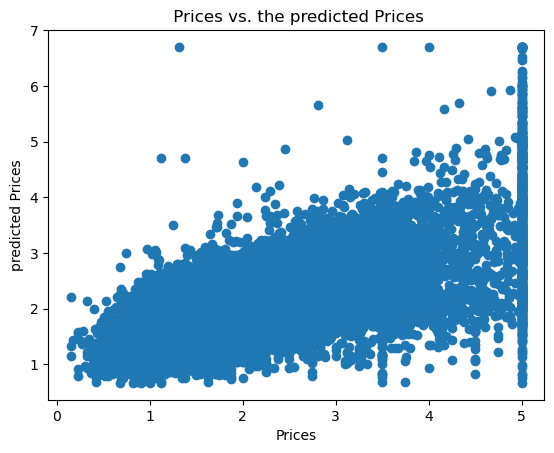

In [35]:
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("predicted Prices")
plt.title(" Prices vs. the predicted Prices")
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


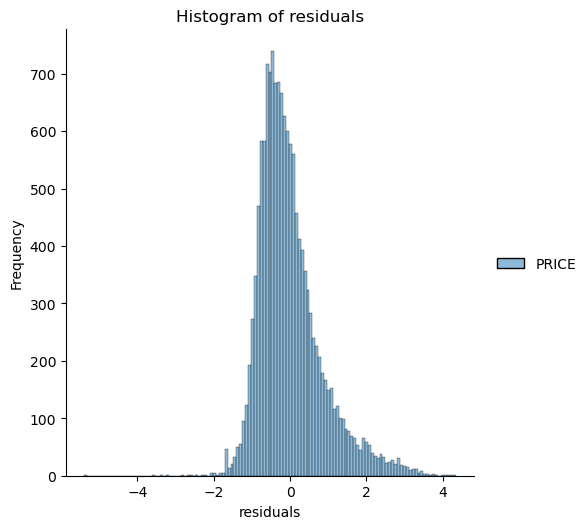

In [36]:
sns.displot(Y_train- Y_pred)
plt.title ("Histogram of residuals")
plt.xlabel("residuals")
plt.ylabel("Frequency")
plt.show()

# Multiple linear regression 

here, we use all of the existing variables (independent features) within the dataframe for our MLR model 

In [37]:
X= data.drop(['PRICE'], axis= 1)
Y= data['PRICE']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 4)

In [39]:
from sklearn.linear_model import LinearRegression 

mlr= LinearRegression()

mlr.fit(X_train, Y_train)

LinearRegression()

In [40]:
mlr.intercept_

-36.9258842988461

In [41]:
mlr.coef_

array([ 4.38284149e-01,  9.02141800e-03, -1.13436409e-01,  6.48834993e-01,
       -7.98668870e-06, -3.97828751e-03, -4.21168217e-01, -4.34680482e-01])

In [42]:
coefficients= pd.DataFrame([X_train.columns,mlr.coef_]).T
coefficients= coefficients.rename(columns= {0: 'Attribute', 1: 'Coefficients'})
coefficients

,Attribute,Coefficients
0,MedInc,0.438284
1,HouseAge,0.009021
2,AveRooms,-0.113436
3,AveBedrms,0.648835
4,Population,-0.000008
5,AveOccup,-0.003978
6,Latitude,-0.421168
7,Longitude,-0.43468


# MLR evaluation 

In [43]:
Y_pred= mlr.predict(X_train)

In [45]:
# Model Evaluation
print('R^2:',metrics.r2_score(Y_train, Y_pred))
print('MAE:',metrics.mean_absolute_error(Y_train, Y_pred))
print('MSE:',metrics.mean_squared_error(Y_train, Y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_train, Y_pred)))

R^2: 0.6081901093734017
MAE: 0.5319076620403801
MSE: 0.525845491043439
RMSE: 0.7251520468449627


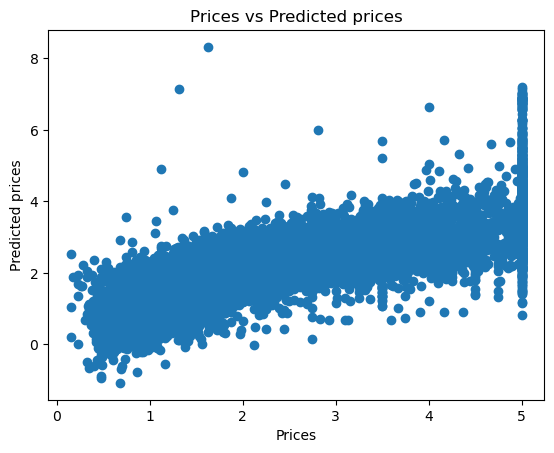

In [46]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(Y_train, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


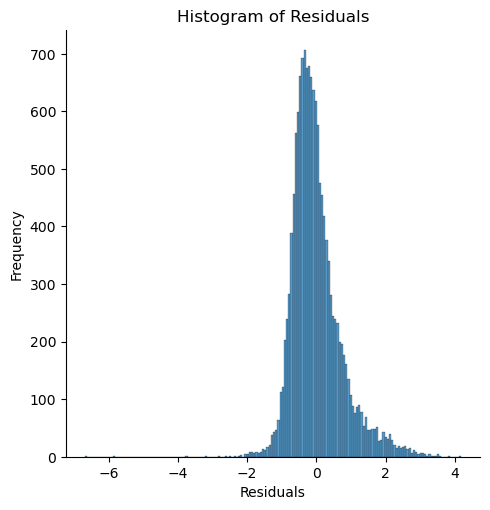

In [47]:
sns.displot(Y_train-Y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Polynomial regression 

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_quadratic = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
quadratic = LinearRegression()

quadratic.fit(X_train_quadratic, Y_train)
     
# predicting on training data-set
Y_train_predicted = quadratic.predict(X_train_quadratic)
   
# predicting on test data-set
Y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))

This code snippet demonstrates the process of creating, fitting, and using a polynomial regression model to make predictions on both training and testing datasets. Polynomial regression is a form of regression analysis in which the relationship between the independent variable \(x\) and the dependent variable \(y\) is modeled as an \(n\)th degree polynomial. It's used when the data shows a non-linear relationship that a simple linear regression can't accurately model. Here's a step-by-step explanation:

1. **Polynomial Feature Transformation:**
   ```python
   poly_features = PolynomialFeatures(degree=2)
   ```
   - `PolynomialFeatures(degree=2)` creates an instance of the `PolynomialFeatures` class from the `sklearn.preprocessing` module. This instance is configured to generate polynomial features of degree 2. It means that if the input feature is \(x\), the output will include features \(1\) (the bias), \(x\), and \(x^2\).

2. **Transforming the Training Features:**
   ```python
   X_train_quadratic = poly_features.fit_transform(X_train)
   ```
   - `fit_transform(X_train)` applies two operations: it first fits the model to the data, determining the min-max values of the features if needed, and then transforms the features in `X_train` into quadratic features. The transformed features are stored in `X_train_quadratic`, which now contains the original features plus the squared terms and an intercept term.

3. **Fitting the Transformed Features to Linear Regression:**
   ```python
   quadratic = LinearRegression()
   quadratic.fit(X_train_quadratic, y_train)
   ```
   - A `LinearRegression` model instance is created and then fitted to the transformed quadratic features (`X_train_quadratic`) and the target variable (`y_train`). Although the underlying relationship between the transformed features and the target is linear from the model's perspective, the actual relationship between the original features and the target is quadratic.

4. **Predicting on Training Dataset:**
   ```python
   y_train_predicted = quadratic.predict(X_train_quadratic)
   ```
   - The model, now trained on the quadratic features, is used to make predictions on the training dataset itself. These predictions are stored in `y_train_predicted`. This can be useful for evaluating the training performance of the model, such as calculating the training error.

5. **Transforming the Test Features and Predicting on Test Dataset:**
   ```python
   y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))
   ```
   - Before making predictions on the test dataset (`X_test`), it's crucial to transform its features to match the quadratic feature space used for training. Note that `fit_transform` is used again, but typically, you should use just `transform` on the test set to avoid data leakage and ensure the transformation is consistent with the training set. This seems to be an oversight in the snippet. After transformation, the model makes predictions on the test dataset, stored in `y_test_predicted`.

In summary, this snippet outlines the process of using polynomial features to extend linear regression for cases where the relationship between variables is non-linear. It includes generating polynomial features, fitting a linear model to these features, and making predictions on both training and test datasets. However, be mindful of the potential mistake in using `fit_transform` on the test set; instead, `transform` should be used to ensure the transformation applied is consistent with the one applied to the training set.

In [57]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7379,2.1473,41.0,3.416185,1.000000,1644.0,4.751445,33.97,-118.24
16825,3.5250,34.0,4.296296,0.895062,398.0,2.456790,37.63,-122.49
4424,1.5491,20.0,1.640000,0.680000,87.0,3.480000,34.06,-118.25
17693,5.7078,17.0,5.395735,1.014218,1887.0,4.471564,37.28,-121.81
19584,5.6945,36.0,6.191489,1.021277,124.0,2.638298,37.59,-120.59


## A mistake in the source code 

The advice about using `transform` instead of `fit_transform` on the test dataset addresses a crucial concept in machine learning: avoiding data leakage and ensuring that the model is evaluated on truly unseen data. Here's a deeper explanation of these points:

### Data Leakage

- **Data Leakage:** This occurs when information from outside the training dataset is used to create the model. This can lead to overly optimistic performance metrics during training and testing phases and can result in poor performance when the model is deployed in a real-world setting. In the context of feature transformation, using `fit_transform` on the test set might introduce data leakage because it recalculates any transformation parameters based on the test set before transforming it. Essentially, you're allowing the model to peek at the test data during training, albeit indirectly, which can bias the model.

### Ensuring Consistent Transformation

- **Fitting on Training Data:** When you use `fit_transform` on the training data (`X_train`), the transformation (like `PolynomialFeatures`) learns any necessary parameters from this data. For polynomial features, there might not be explicit parameters to learn since the transformation is deterministic and based only on the degree of the polynomial specified. However, for other transformations that compute statistics (like scaling or normalization), `fit` calculates these necessary statistics (e.g., mean, standard deviation) from the training data.

- **Transforming the Test Data:** The correct practice is to then use the `transform` method (not `fit_transform`) on the test data (`X_test`). This uses the parameters learned from the training data to transform the test data. This ensures that the transformation applied to the test data is consistent with the transformation applied to the training data, making the training and test datasets compatible for model evaluation.

### Why `transform` and Not `fit_transform` for Test Data

- Using `fit_transform` on the test set, especially for transformations that involve learning parameters, would cause the transformation to adjust these parameters based on the test data. This not only risks data leakage but also breaks the consistency between how the training and test data are processed. For polynomial features, even though the parameter learning is not applicable, using `transform` is still the best practice to maintain consistency in preprocessing steps across different types of transformations.

- Ensuring that both training and test datasets undergo the same preprocessing steps (using the same parameters learned from the training set) is crucial for the fairness and accuracy of the model evaluation process. The model should be tested under the same conditions as it was trained, using the test set as a stand-in for future, unseen data.

In summary, the advice highlights the best practice of using `transform` on the test dataset to avoid inadvertently giving the model access to information it shouldn't have (preventing data leakage) and to ensure that the test data is processed in exactly the same way as the training data, using the parameters learned from the training data. This makes the testing phase a more accurate reflection of how the model will perform on truly unseen data.

## Eddited version based on the mistake made 

In [66]:
# predicting on test data-set
Y_test_predicted = quadratic.predict(poly_features.transform(X_test))

In [67]:
X_train_quadratic[[0]]

array([[ 1.00000000e+00,  2.14730000e+00,  4.10000000e+01,
         3.41618497e+00,  1.00000000e+00,  1.64400000e+03,
         4.75144509e+00,  3.39700000e+01, -1.18240000e+02,
         4.61089729e+00,  8.80393000e+01,  7.33557399e+00,
         2.14730000e+00,  3.53016120e+03,  1.02027780e+01,
         7.29437810e+01, -2.53896752e+02,  1.68100000e+03,
         1.40063584e+02,  4.10000000e+01,  6.74040000e+04,
         1.94809249e+02,  1.39277000e+03, -4.84784000e+03,
         1.16703198e+01,  3.41618497e+00,  5.61620809e+03,
         1.62318153e+01,  1.16047803e+02, -4.03929711e+02,
         1.00000000e+00,  1.64400000e+03,  4.75144509e+00,
         3.39700000e+01, -1.18240000e+02,  2.70273600e+06,
         7.81137572e+03,  5.58466800e+04, -1.94386560e+05,
         2.25762304e+01,  1.61406590e+02, -5.61810867e+02,
         1.15396090e+03, -4.01661280e+03,  1.39806976e+04]])

## model evaluation

In [68]:
metrics.r2_score(Y_train, Y_train_predicted)

0.697055435513924

In [69]:
metrics.r2_score(Y_test, Y_test_predicted)

0.4799914924515505

 ## Let's set the degree to 3 now (Cubic)

In [70]:
"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=3)
   
# transform the features to higher degree features.
X_train_cubic = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
cubic = LinearRegression()

cubic.fit(X_train_cubic, Y_train)
     
# predicting on training data-set
Y_train_predicted = cubic.predict(X_train_cubic)
   
# predicting on test data-set
Y_test_predicted = cubic.predict(poly_features.transform(X_test))

## Model evaluation 

In [71]:
metrics.r2_score(Y_train, Y_train_predicted)

0.7447841460906479

In [72]:
metrics.r2_score(Y_test, Y_test_predicted)

-41820.56593404423

An \(R^2\) score of 0.74 for the training data suggests that your model explains 74% of the variance in the target variable based on the input features, which is generally considered a decent score depending on the context and the complexity of the problem you're tackling. However, an \(R^2\) score of -41 for the test dataset is highly unusual and indicates a significant problem with how the model is generalizing to new, unseen data. The \(R^2\) score, or the coefficient of determination, ranges from -∞ to 1, where:
- A score of 1 indicates a perfect fit.
- A score of 0 indicates that the model does as well as a simple mean of the target values, with no regard to the input features.
- A negative \(R^2\) score indicates that the model performs worse than a simple mean of the target values, which is typically a sign of a severely overfitting model or other significant issues.

Several factors could contribute to such a drastic difference between the training and test \(R^2\) scores:

### Overfitting
Your model may have overfit the training data. Overfitting occurs when a model learns the details and noise in the training data to the extent that it negatively impacts the model's performance on new data. This is especially common in models with high complexity, such as polynomial regression with a high degree, leading to capturing noise as if it were a legitimate pattern.

### Data Leakage
As previously mentioned, if there was any data leakage during the model training process, your model might perform unrealistically well on the training data but fail on the test data. However, data leakage typically results in overly optimistic training performance, which doesn't directly explain the negative \(R^2\) score on the test set unless the leakage led to incorrect model training or validation procedures.

### Feature Transformation Consistency
If the feature transformation applied to the test data is not consistent with the transformation applied to the training data, the model might receive input in a form it hasn't learned to predict accurately. For example, if `fit_transform` was mistakenly used on the test data for some transformations (leading to different scaling, normalization, or polynomial feature calculations), the model predictions can be off.

### Dataset Discrepancy
There might be a significant discrepancy between the training and test datasets. If the test set contains outliers or values not represented or significantly underrepresented in the training set, the model might fail to make accurate predictions for those points. This is also related to the model's generalization ability but highlights the importance of ensuring that the training and test sets are representative of the same population.

### Error in Model Application
Ensure that there were no errors in how the model was applied to the test data, such as incorrect feature selection, accidental inclusion of target variable information in the features, or issues with data preprocessing that led to incorrect input data for the model.

### Debugging Steps
- **Review the feature preprocessing pipeline** to ensure consistency between training and test datasets.
- **Check for overfitting** by using simpler models or applying regularization techniques.
- **Validate the model** with cross-validation to ensure its robustness and generalization capability.
- **Examine the test data** for outliers or leverage points that could disproportionately affect the model's performance.
- **Experiment with model complexity**, possibly reducing the degree of polynomial features if you're using polynomial regression, to see if a simpler model generalizes better.